In [2]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "Projection_Square10000_ClockCounterWise_Vs_NotSequential_Efficiency"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
# df = pd.read_csv('./data/cdl-linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations
df = pd.read_csv('./data/Projection_Square10000_ClockCounterWise_Vs_NotSequential.csv', sep=";")
pd.set_option('expand_frame_repr', False)

#   Calculate SpeedUp - ClockCounterWise
df["SpeedUp P1 - ClockCounterWise"] = df.iloc[0]["P1 - ClockCounterWise - Runtime (s)"]/df["P1 - ClockCounterWise - Runtime (s)"]
df["SpeedUp P4 - ClockCounterWise"] = df.iloc[0]["P4 - ClockCounterWise - Runtime (s)"]/df["P4 - ClockCounterWise - Runtime (s)"]
df["SpeedUp P6 - ClockCounterWise"] = df.iloc[0]["P6 - ClockCounterWise - Runtime (s)"]/df["P6 - ClockCounterWise - Runtime (s)"]
df["SpeedUp P9 - ClockCounterWise"] = df.iloc[0]["P9 - ClockCounterWise - Runtime (s)"]/df["P9 - ClockCounterWise - Runtime (s)"]

#   Calculate SpeedUp - NotSequential
df["SpeedUp P1 - NotSequential"] = df.iloc[0]["P1 - NotSequential - Runtime (s)"]/df["P1 - NotSequential - Runtime (s)"]
df["SpeedUp P4 - NotSequential"] = df.iloc[0]["P4 - NotSequential - Runtime (s)"]/df["P4 - NotSequential - Runtime (s)"]
df["SpeedUp P6 - NotSequential"] = df.iloc[0]["P6 - NotSequential - Runtime (s)"]/df["P6 - NotSequential - Runtime (s)"]
df["SpeedUp P9 - NotSequential"] = df.iloc[0]["P9 - NotSequential - Runtime (s)"]/df["P9 - NotSequential - Runtime (s)"]

#   Calculate Efficiency - ClockCounterWise
df["Efficiency P1 - ClockCounterWise"] = df["SpeedUp P1 - ClockCounterWise"]/df["Num. Nodes"]
df["Efficiency P4 - ClockCounterWise"] = df["SpeedUp P4 - ClockCounterWise"]/df["Num. Nodes"]
df["Efficiency P6 - ClockCounterWise"] = df["SpeedUp P6 - ClockCounterWise"]/df["Num. Nodes"]
df["Efficiency P9 - ClockCounterWise"] = df["SpeedUp P9 - ClockCounterWise"]/df["Num. Nodes"]

#   Calculate Efficiency - NotSequential
df["Efficiency P1 - NotSequential"] = df["SpeedUp P1 - NotSequential"]/df["Num. Nodes"]
df["Efficiency P4 - NotSequential"] = df["SpeedUp P4 - NotSequential"]/df["Num. Nodes"]
df["Efficiency P6 - NotSequential"] = df["SpeedUp P6 - NotSequential"]/df["Num. Nodes"]
df["Efficiency P9 - NotSequential"] = df["SpeedUp P9 - NotSequential"]/df["Num. Nodes"]
df

Num. Nodes  Num. DOFs (P1)  Num. DOFs (P4)  Num. DOFs (P6)  Num. DOFs (P9)  P1 - ClockCounterWise - Runtime (s)  P4 - ClockCounterWise - Runtime (s)  P6 - ClockCounterWise - Runtime (s)  P9 - ClockCounterWise - Runtime (s)  P1 - NotSequential - Runtime (s)  ...  SpeedUp P6 - NotSequential  SpeedUp P9 - NotSequential  Efficiency P1 - ClockCounterWise  Efficiency P4 - ClockCounterWise  Efficiency P6 - ClockCounterWise  Efficiency P9 - ClockCounterWise  Efficiency P1 - NotSequential  Efficiency P4 - NotSequential  Efficiency P6 - NotSequential  Efficiency P9 - NotSequential
0           1           10206          160821          361231          811846                             2.600000                            15.470000                            30.490000                            64.150000                          2.530000  ...                    1.000000                    1.000000                          1.000000                          1.000000                          1.000000                          1.000000                       1.000000                       1.000000                       1.000000                       1.000000
1           2           10206          160821          361231          811846                             1.409219                             8.185541                            17.116071                            44.263758                          1.383582  ...                    1.775434                    1.440961                          0.922497                          0.944959                          0.890683                          0.724633                       0.914293                       0.941427                       0.887717                       0.720481
2           4           10206          160821          361231          811846                             0.718145                             4.119353                             8.557272                            22.264808                          0.698021  ...                    3.564421                    2.883909                          0.905110                          0.938861                          0.890763                          0.720307                       0.906133                       0.938032                       0.891105                       0.720977
3           8           10206          160821          361231          811846                             0.357673                             2.074761                             4.285157                            11.203731                          0.347289  ...                    7.078248                    5.716360                          0.908651                          0.932035                          0.889407                          0.715721                       0.910625                       0.935699                       0.884781                       0.714545
4          16           10206          160821          361231          811846                             0.177811                             1.037574                             2.166871                             5.595135                          0.175376  ...                   14.023854                   11.426862                          0.913892                          0.931861                          0.879436                          0.716582                       0.901634                       0.929983                       0.876491                       0.714179
5          32           10206          160821          361231          811846                             0.089952                             0.526406                             1.098076                             2.810103                          0.088587  ...                   27.815953                   22.581947                          0.903260                          0.918374                          0.867711                          0.713386                       0.892484                       0.91628

In [3]:
# print(df.columns)
aggregate_operations = {
    'Efficiency P1 - ClockCounterWise':'max',
    'Efficiency P4 - ClockCounterWise':'max',
    'Efficiency P6 - ClockCounterWise':'max',
    'Efficiency P9 - ClockCounterWise':'max',
    'Efficiency P1 - NotSequential':'max',
    'Efficiency P4 - NotSequential':'max',
    'Efficiency P6 - NotSequential':'max',
    'Efficiency P9 - NotSequential':'max'
}
df = df.groupby(['Num. Nodes'], as_index=False).agg(aggregate_operations)
df["Ideal Speedup"] = df["Num. Nodes"]
df.columns

Index(['Num. Nodes', 'Efficiency P1 - ClockCounterWise',
       'Efficiency P4 - ClockCounterWise', 'Efficiency P6 - ClockCounterWise',
       'Efficiency P9 - ClockCounterWise', 'Efficiency P1 - NotSequential',
       'Efficiency P4 - NotSequential', 'Efficiency P6 - NotSequential',
       'Efficiency P9 - NotSequential', 'Ideal Speedup'],
      dtype='object')

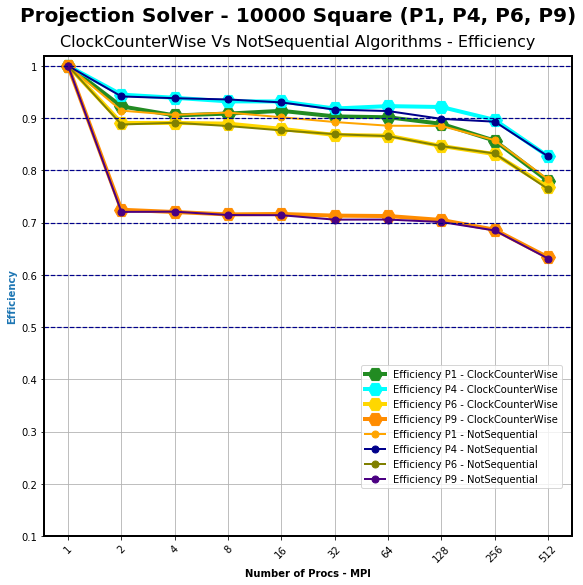

In [21]:
# fig = plt.subplots()
fig = plt.figure(figsize=(8,8))
color='tab:blue'
#   Plotar os valores dos graficos para P1 e P4.
plt.plot(df['Num. Nodes'], df['Efficiency P1 - ClockCounterWise'], marker='H', markersize=14, color='forestgreen', linewidth=4)
plt.plot(df['Num. Nodes'], df['Efficiency P4 - ClockCounterWise'], marker='H', markersize=14, color='cyan', linewidth=4)
plt.plot(df['Num. Nodes'], df['Efficiency P6 - ClockCounterWise'], marker='H', markersize=14, color='gold', linewidth=4)
plt.plot(df['Num. Nodes'], df['Efficiency P9 - ClockCounterWise'], marker='H', markersize=14, color='darkorange', linewidth=4)

plt.plot(df['Num. Nodes'], df['Efficiency P1 - NotSequential'], marker='.', markersize=14, color='orange', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P4 - NotSequential'], marker='.', markersize=14, color='darkblue', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P6 - NotSequential'], marker='.', markersize=14, color='olive', linewidth=2)
plt.plot(df['Num. Nodes'], df['Efficiency P9 - NotSequential'], marker='.', markersize=14, color='indigo', linewidth=2)

#   Define a escala do grafico
plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
# plt.xticks([1, 16, 32, 64, 128, 256, 512], [1, 16, 32, 64, 128, 256, 512], rotation=90)
plt.xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512], [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], rotation=45)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

lines = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Square (P1, P4, P6, P9)'
subtitle = 'ClockCounterWise Vs NotSequential Algorithms - Efficiency\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.90)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold')
plt.ylabel('Efficiency', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.60, 0.1), frameon = True)
plt.grid()
plt.show()